# Maximum likelyhood estimation analysis 

## Hypotesis
There is a probable flare from Cygnus X-3.

Check http://www.astronomerstelegram.org/?read=13458

In [98]:
from os.path import join, expandvars
import shutil
from agilepy.api.AGAnalysis import AGAnalysis
from pathlib import Path

## Data

In [99]:
tmin=58884.0
tmax=58886.0
timetype="MJD"
l=79.8
b=0.7
sources_hypotesis = """
15.7017e-08 80.3286 1.12047 2.16619 0 2 _2AGLJ2032+4135 0 0 0 0 0.5 5 20 10000 0 100
16.9737e-08 79.3 0.55 2.1 3 2 CYGX3 0 0 0 0 0.5 5 20 10000 0 100
119.303e-08 78.2375 2.12298 1.75823 0 2 _2AGLJ2021+4029 0 1 3307.63 0 0.5 5 20 10000 0 100
"""
log_index="/AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index"
evt_index="/AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index"

out_dir = expandvars("$HOME/agilepy_analysis/cygnus/output")

work_dir=expandvars("$HOME/agilepy_analysis/cygnus/conf")


if Path(out_dir).exists():
    print("deleting",out_dir)
    shutil.rmtree(out_dir)


Path(work_dir).mkdir(parents=True, exist_ok=True)


print("Working directory:", work_dir)

deleting /home/rt/agilepy_analysis/cygnus/output
Working directory: /home/rt/agilepy_analysis/cygnus/conf


The tmin and tmax ISO datas can be converted to MJD or TT with the following web tool: https://tools.ssdc.asi.it/conversionTools

## Configuration file

In [100]:
conf_file_path = join(work_dir,"agilepy_conf.yaml")

In [101]:
conf_file = """
input:
  evtfile: %s
  logfile: %s

output:
  outdir: %s
  filenameprefix: cygnus_analysis
  logfilenameprefix: cygnus_analysis
  verboselvl: 0

model:
  galcoeff: 0.63
  isocoeff: 7.3889
  
maps:
  binsize: 0.25
  
selection:
  tmin: %f
  tmax: %f
  timetype: MJD
  glon: %f
  glat: %f
  
mle:
  loccl: 95
  
"""%(evt_index, log_index, out_dir, tmin, tmax, l, b)

In [102]:
with open(conf_file_path , "w") as cf:
    cf.write(conf_file)

## Sources file

In [103]:
sources_file_path = join(work_dir,"sources.txt")
print(sources_file_path)

/home/rt/agilepy_analysis/cygnus/conf/sources.txt


In [104]:
with open(sources_file_path, "w") as sf:
    sf.write(sources_hypotesis)

## Starting the analysis

In [105]:
aga = AGAnalysis(conf_file_path, sources_file_path)

In [106]:
#isoBkg, galBkg = aga.calcBkg('CYGX3')
#print("iso:",isoBkg)
#print("gal:",galBkg)

In [107]:
maplistfile = aga.generateMaps()

In [108]:
maps = aga.getSkyMaps()
maps

[['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz',
  '/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz',
  '/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz']]

In [109]:
cts_map = maps[0][0]
exp_map = maps[0][1]

In [110]:
%matplotlib notebook

<IPython.core.display.Javascript object>


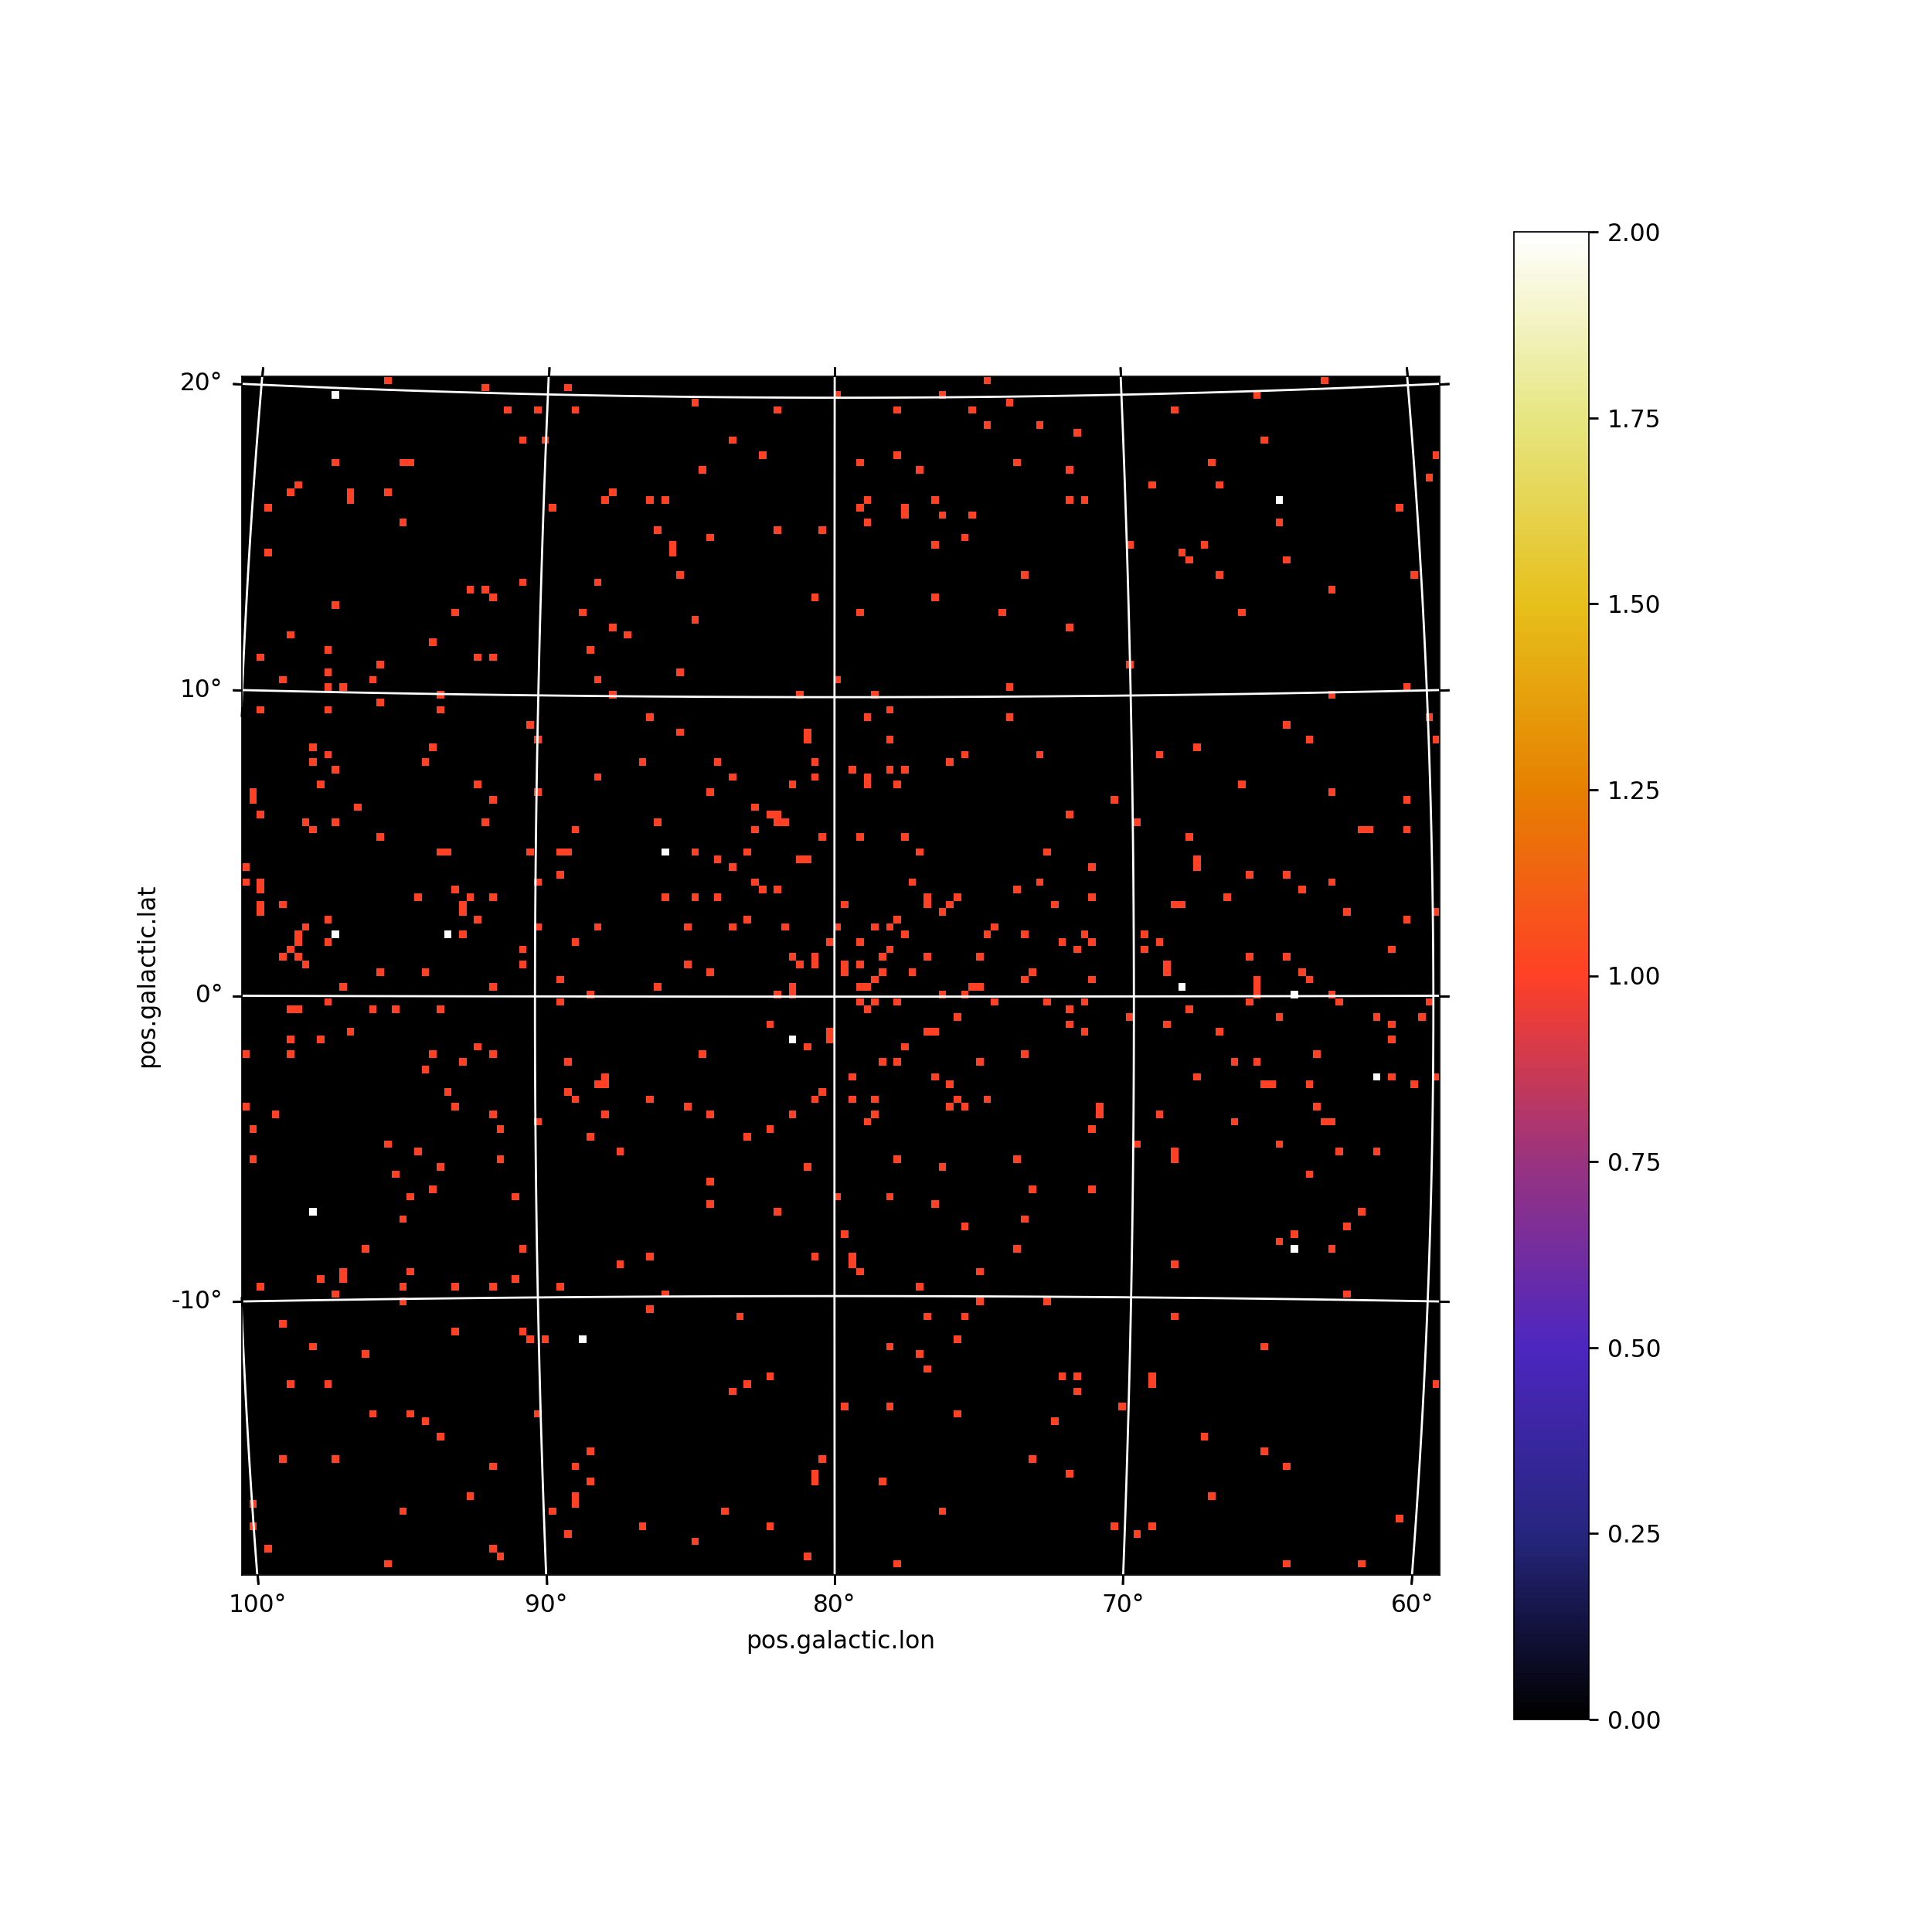

In [111]:
aga.displaySkyMap(cts_map)

<IPython.core.display.Javascript object>


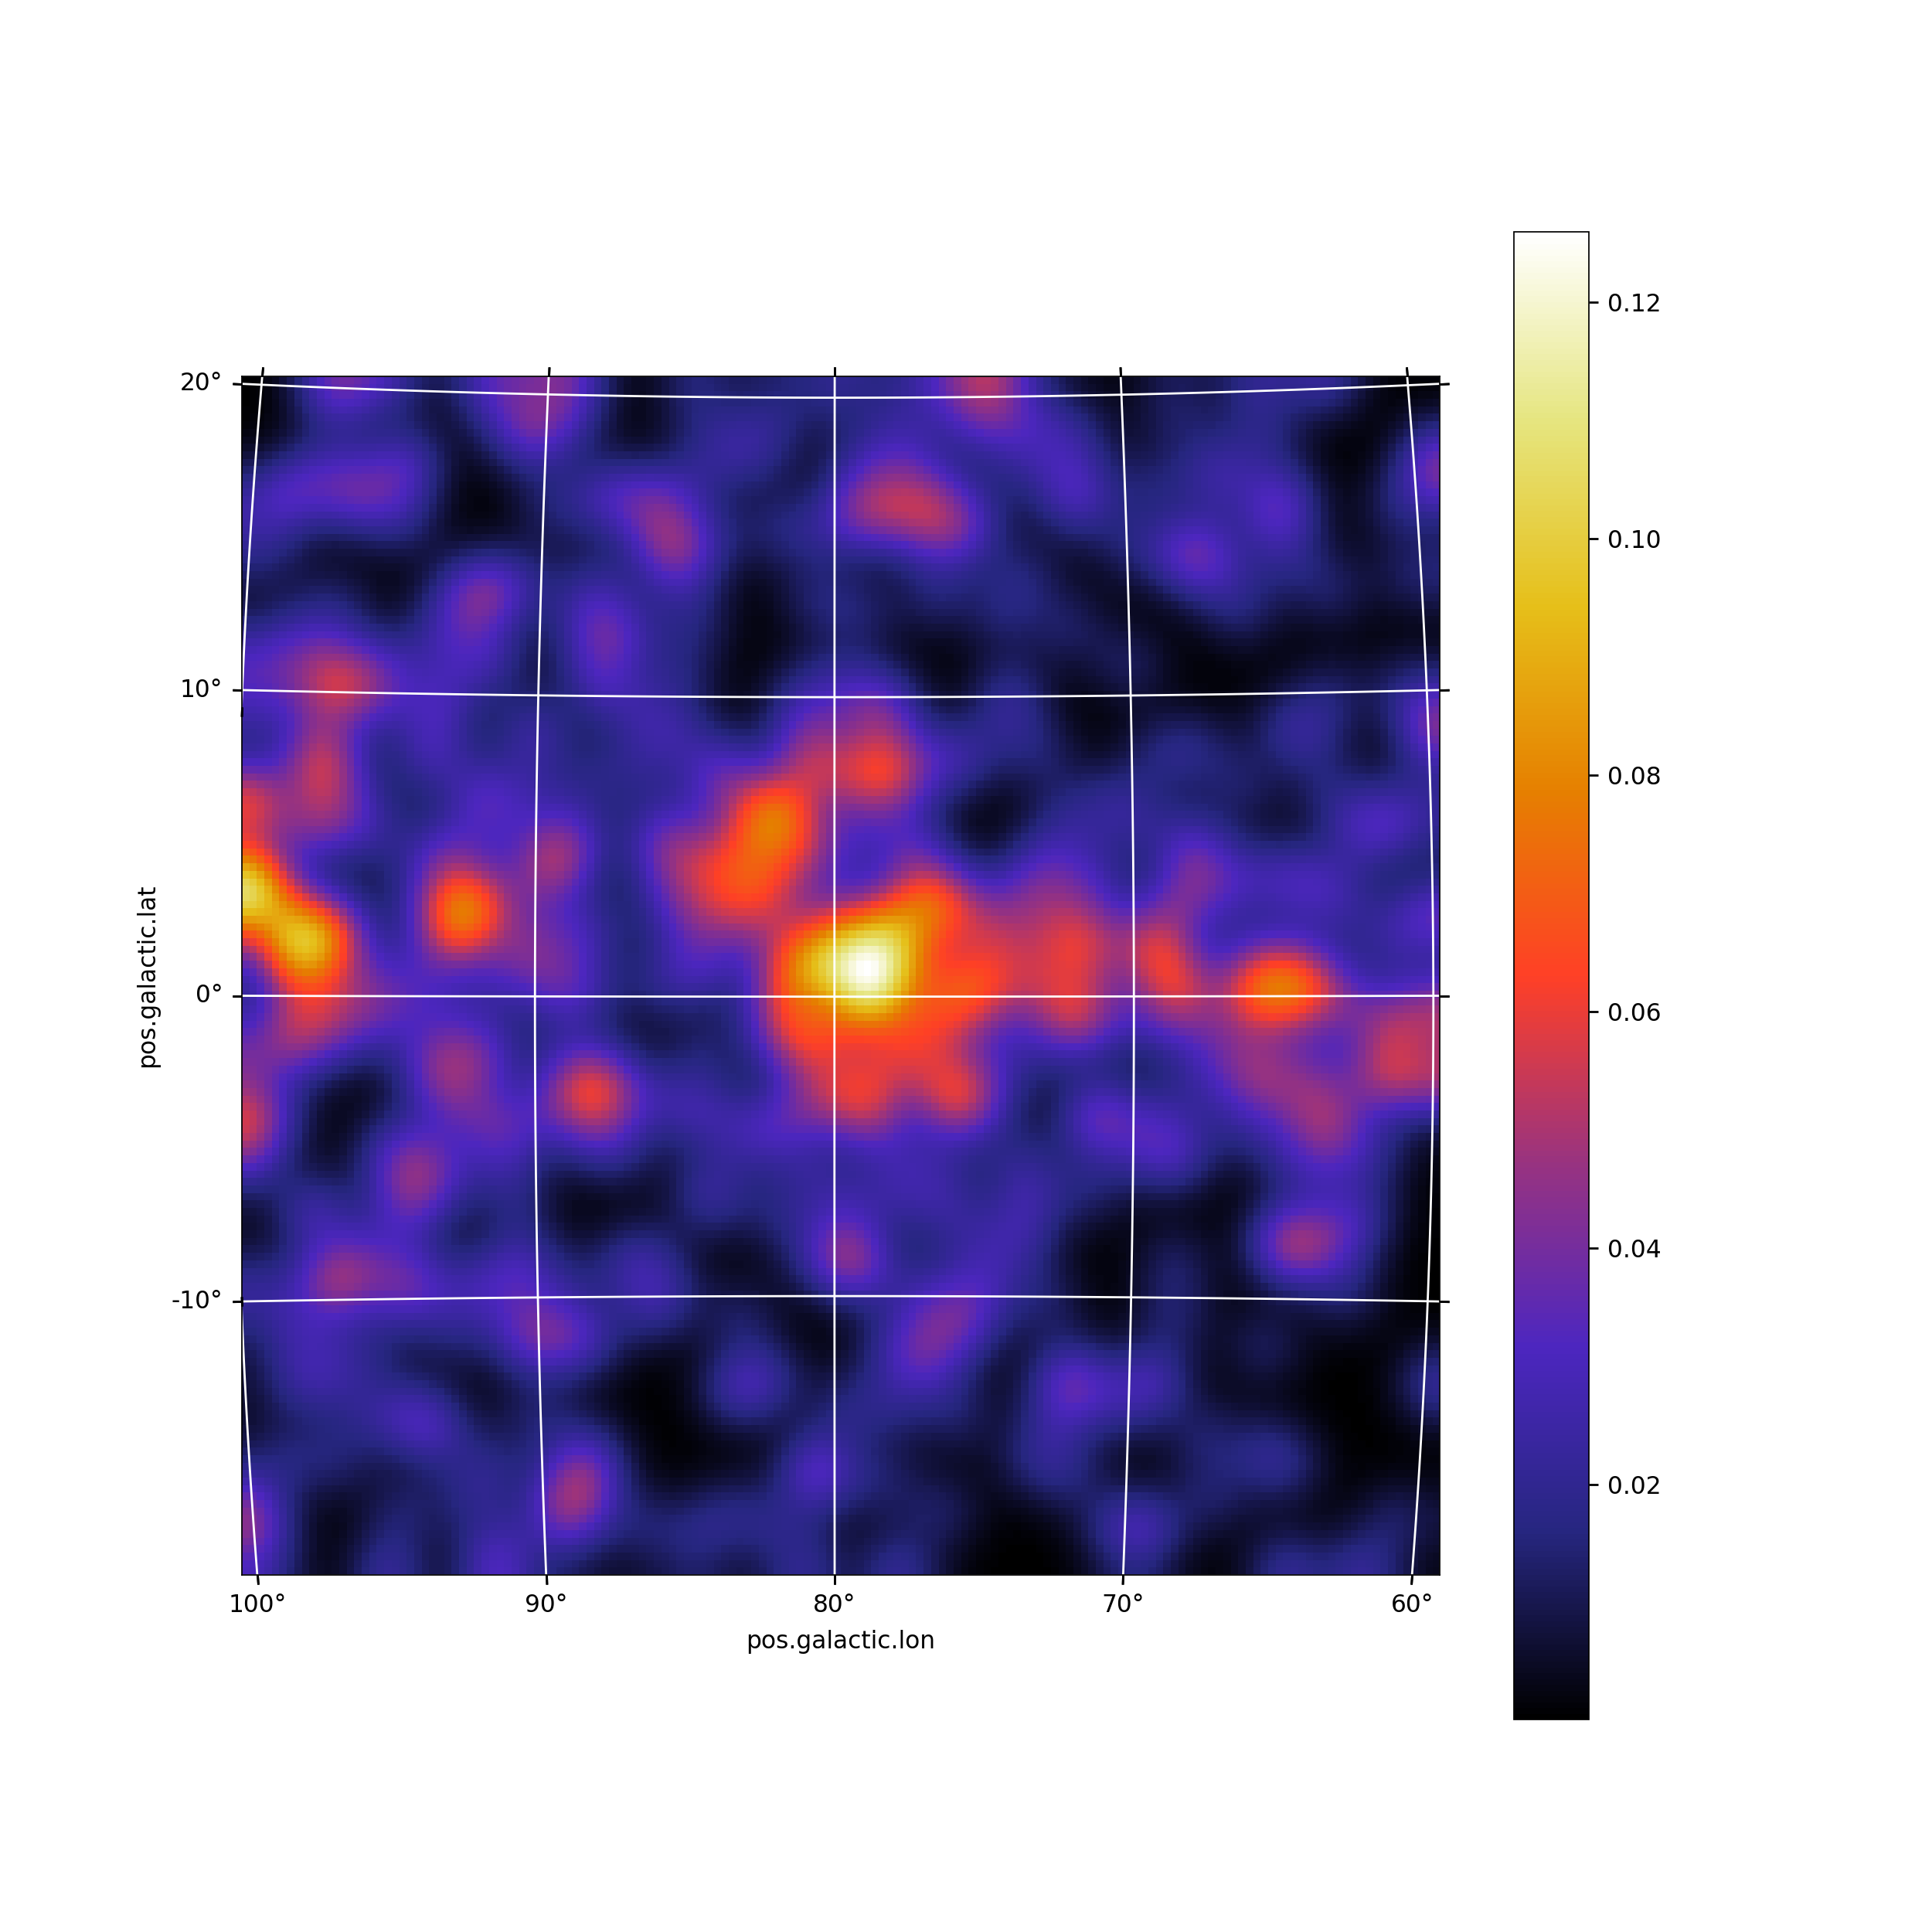

In [112]:
aga.displaySkyMap(cts_map, smooth=3)

<IPython.core.display.Javascript object>


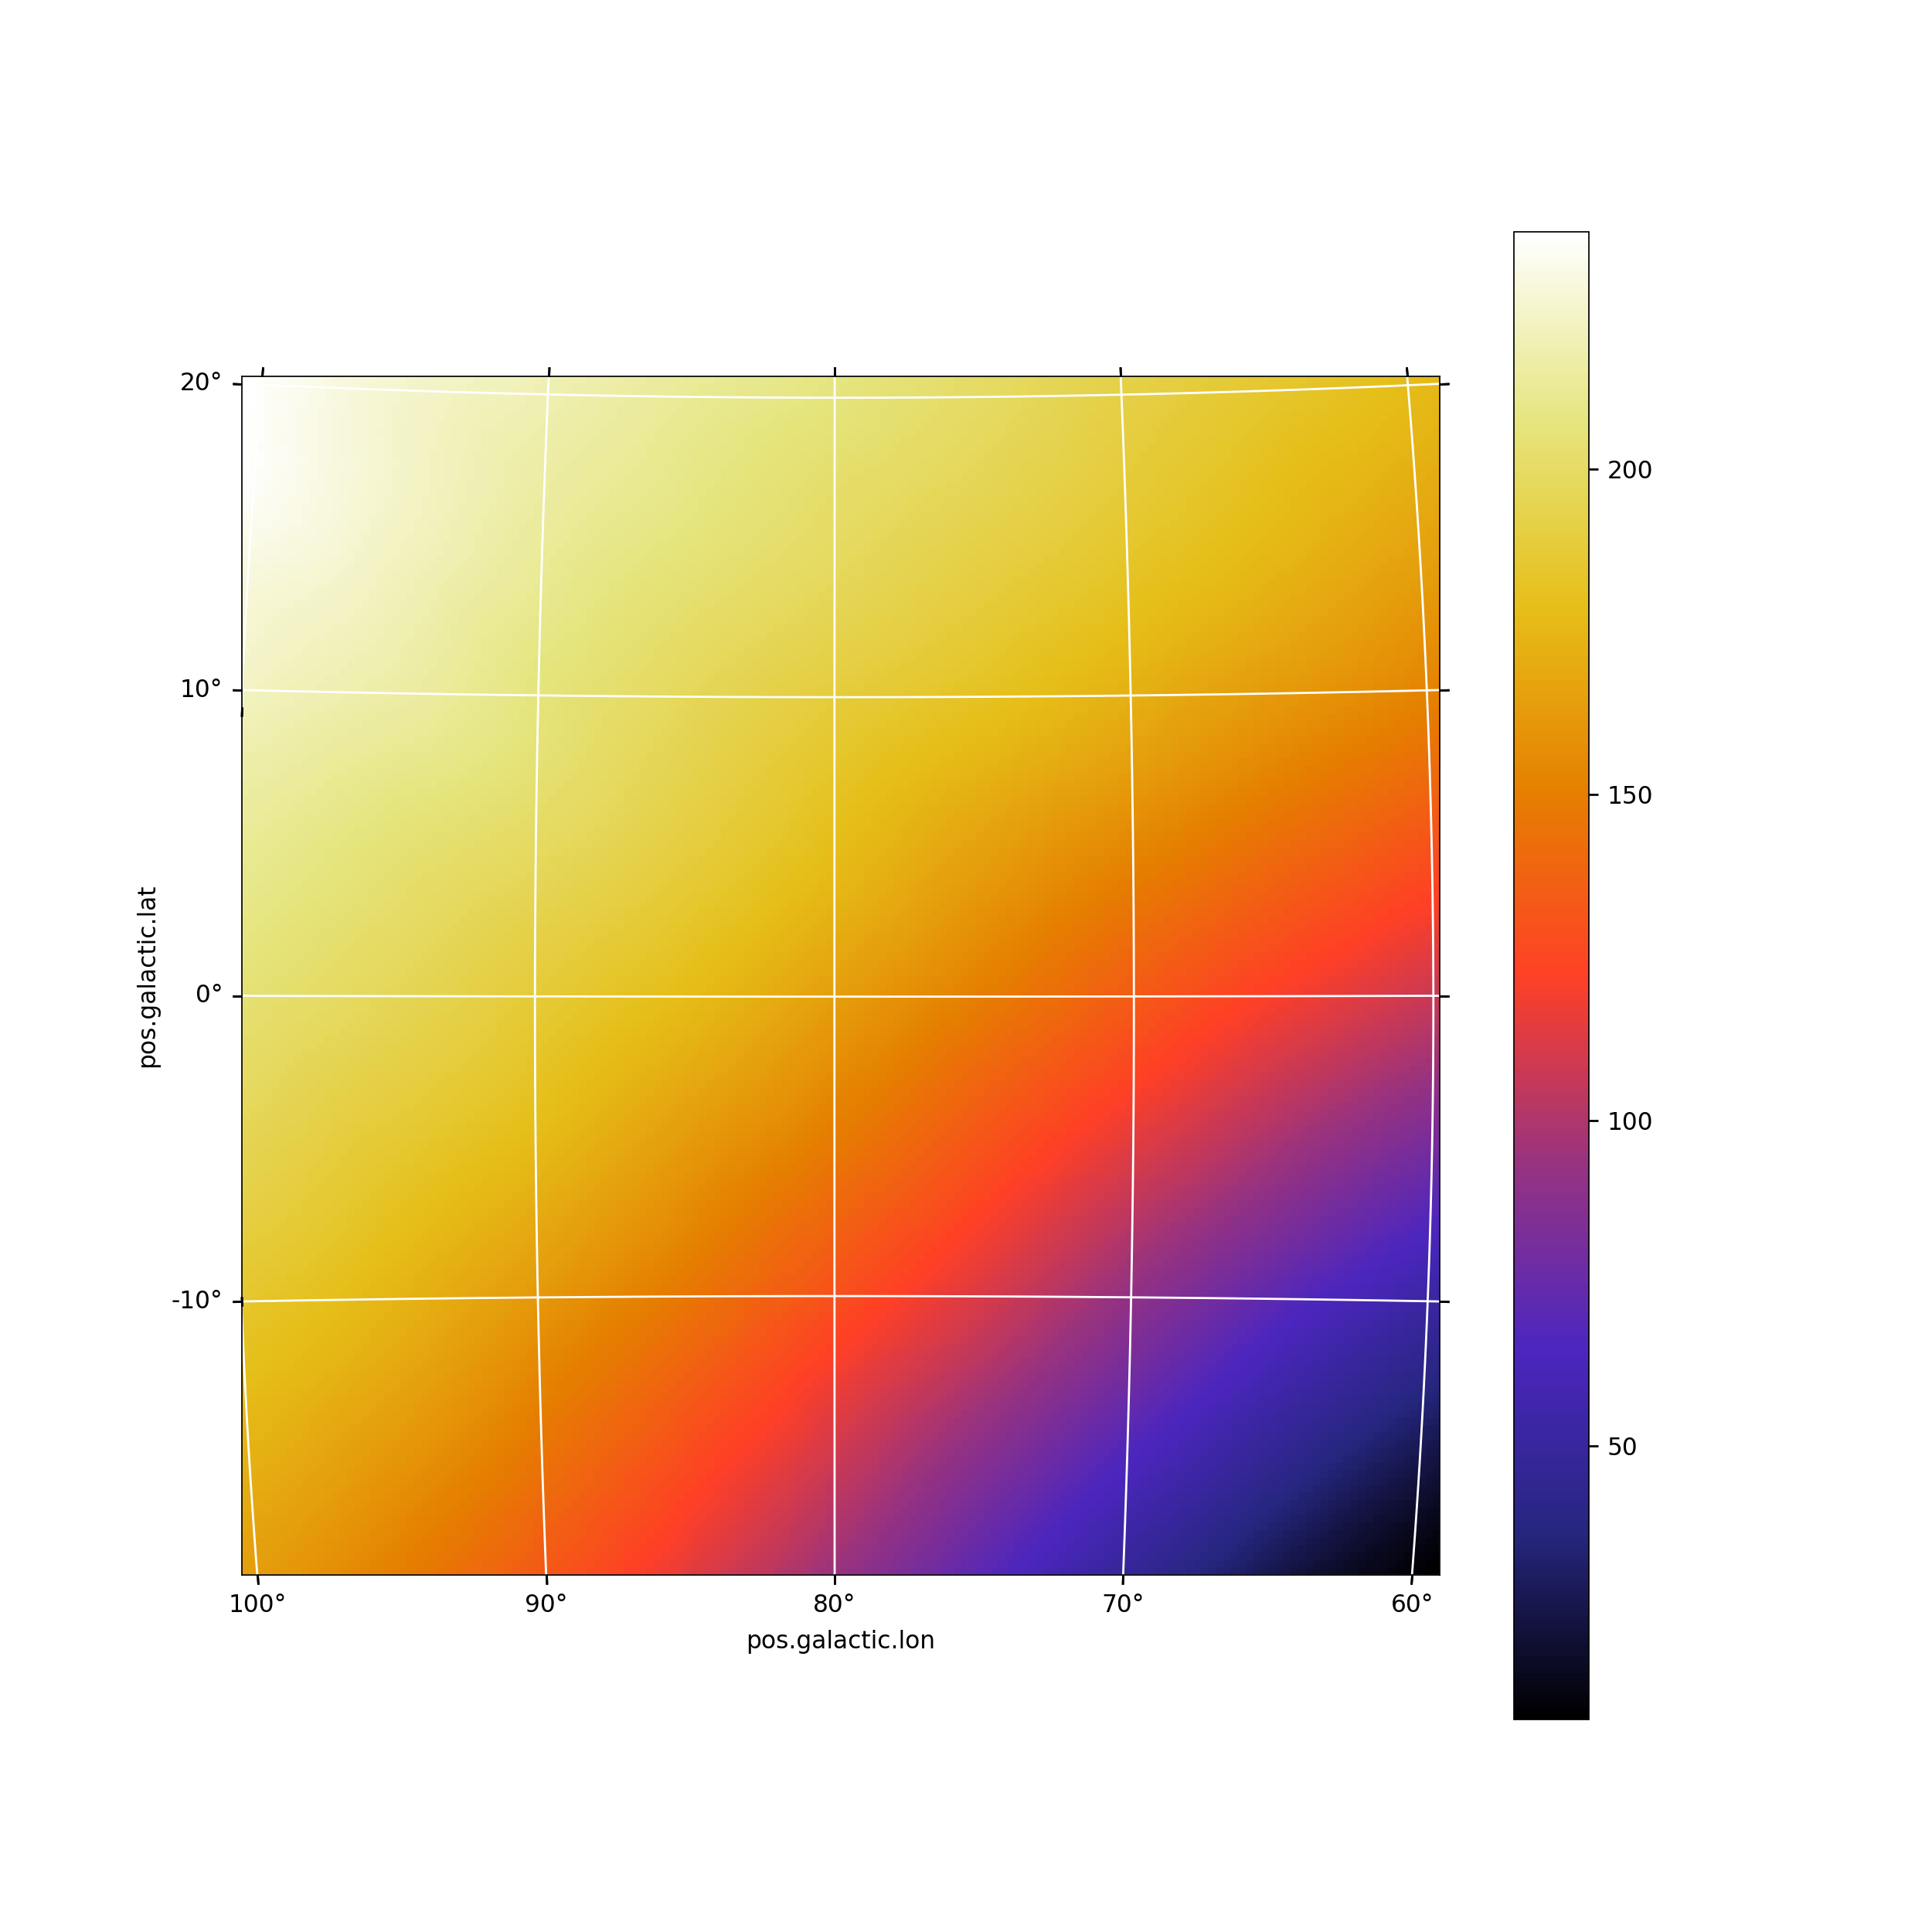

In [113]:
aga.displaySkyMap(exp_map)

In [ ]:
aga.setOptions(galcoeff=0.617196, isocoeff=7.50296)

In [114]:
aga.mle(maplistfile)

['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source']

In [116]:
sources = aga.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: CYGX3 (PointSource) => sqrt(ts): 3.28574
  * Position:
	- start_pos: (79.3, 0.55)
  * Spectrum: (PowerLaw)
	- flux: 1.69737e-07
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux: 2.57143e-06 +- 1.05269e-06
	- upper limit: 4.96414e-06
	- ergLog: 4.15584e-10 +- 1.70132e-10
	- galCoeff: [0.63]
	- isoCoeff: [7.3889]
	- L_peak: 78.9289
	- B_peak: 0.326033
	- distFromStartPos: 0.433429
	- L: 78.8956
	- B: 0.499197
	- distFromStartPos: 0.407571
	- r: 1.01222
	- a: 1.12515
	- b: 0.905752
	- phi: 68.8532
-----------------------------------------------------------


In [117]:
sources = aga.selectSources("sqrtTS >= 0")


-----------------------------------------------------------
Source name: _2AGLJ2032+4135 (PointSource) => sqrt(ts): 0.0
  * Position:
	- start_pos: (80.3286, 1.12047)
  * Spectrum: (PowerLaw)
	- flux: 1.57017e-07
	- index: 2.16619
  * Free params: 
  * Multi analysis:
	- flux: 1.57017e-07 +- 0.0
	- upper limit: 0.0
	- ergLog: 2.53765e-11 +- 0.0
	- galCoeff: [0.0]
	- isoCoeff: [0.0]
-----------------------------------------------------------

-----------------------------------------------------------
Source name: CYGX3 (PointSource) => sqrt(ts): 3.28574
  * Position:
	- start_pos: (79.3, 0.55)
  * Spectrum: (PowerLaw)
	- flux: 1.69737e-07
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux: 2.57143e-06 +- 1.05269e-06
	- upper limit: 4.96414e-06
	- ergLog: 4.15584e-10 +- 1.70132e-10
	- galCoeff: [0.63]
	- isoCoeff: [7.3889]
	- L_peak: 78.9289
	- B_peak: 0.326033
	- distFromStartPos: 0.433429
	- L: 78.8956
	- B: 0.499197
	- distFromStartPos: 0.407571
	- r: 1.01222
	- a: 

In [ ]:
#aga.setOptions(galcoeff=0.617196, isocoeff=7.50296)

In [118]:
sources = aga.freeSources('name == "CYGX3"', "pos", False)


-----------------------------------------------------------
Source name: CYGX3 (PointSource) => sqrt(ts): 3.28574
  * Position:
	- start_pos: (79.3, 0.55)
  * Spectrum: (PowerLaw)
	- flux: 1.69737e-07
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux: 2.57143e-06 +- 1.05269e-06
	- upper limit: 4.96414e-06
	- ergLog: 4.15584e-10 +- 1.70132e-10
	- galCoeff: [0.63]
	- isoCoeff: [7.3889]
	- L_peak: 78.9289
	- B_peak: 0.326033
	- distFromStartPos: 0.433429
	- L: 78.8956
	- B: 0.499197
	- distFromStartPos: 0.407571
	- r: 1.01222
	- a: 1.12515
	- b: 0.905752
	- phi: 68.8532
-----------------------------------------------------------


In [119]:
aga.mle(maplistfile)

['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source']

In [120]:
sources = aga.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: CYGX3 (PointSource) => sqrt(ts): 2.87296
  * Position:
	- start_pos: (79.3, 0.55)
  * Spectrum: (PowerLaw)
	- flux: 1.69737e-07
	- index: 2.1
  * Free params: flux
  * Multi analysis:
	- flux: 2.35032e-06 +- 1.03331e-06
	- upper limit: 4.6891e-06
	- ergLog: 3.7985e-10 +- 1.66999e-10
	- galCoeff: [0.63]
	- isoCoeff: [7.3889]
-----------------------------------------------------------
